In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use("seaborn")
sns.set_context("talk")

In [3]:
df = pd.read_csv("../data/Taxicab_Trips_Sampling_in_February_2017.csv")

In [4]:
df.drop_duplicates(inplace=True)
df = df.loc[df.TOTALAMOUNT>0]
df = df.loc[df.TOTALAMOUNT<1000]
df = df.loc[df.METERFARE>0]
df = df.loc[df.TRIPMILEAGE>0]
df = df.loc[df.TRIPMILEAGE<100]
df = df.loc[df.TRIPTIME>0]
df = df.loc[df.TRIPTIME<120]
df = df.loc[df.TRIPMILEAGE/df.TRIPTIME<2]
df.AIRPORT = df.AIRPORT == "Y"
df["pickup_quadrant"] = df.PICKUP_BLOCKNAME.str.extract(r"\s([NS][EW])\b")
df["dropoff_quadrant"] = df.DROPOFF_BLOCKNAME.str.extract(r"\s([NS][EW])\b")

df["tip_ratio"] = df.TIP / df.METERFARE
df["tipping"] = (df.TIP>0) * 1 

df['pickup_datetime'] = pd.to_datetime(df.PICKUPDATETIME_TR)
df['dropoff_datetime'] = pd.to_datetime(df.DROPOFFDATETIME_TR)
df['pickup_date'] = df.pickup_datetime.dt.date
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['dropoff_date'] = df.dropoff_datetime.dt.date
df['dropoff_hour'] = df.dropoff_datetime.dt.hour

df = df.drop(["OBJECTID_1", "OBJECTID"], axis=1)

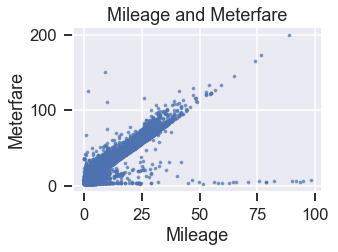

In [5]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df.TRIPMILEAGE, 
            df.METERFARE, 
            s=5, 
            alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Meterfare")
plt.title("Mileage and Meterfare")
plt.tight_layout()
plt.show()

In [6]:
formula = "METERFARE ~ TRIPMILEAGE"
model = smf.ols(formula, df).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              METERFARE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:05:40   Log-Likelihood:            -5.3703e+05
No. Observations:              211661   AIC:                         1.074e+06
Df Residuals:                  211659   BIC:                         1.074e+06
Df Model:                           1                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6118      0.053    105.200      0.000       5.507       5.716
TRIPMILEAGE     2.1702      0.019    113.097      0.000       2.133       2.208
==============================================================================
Omnibus:                   399662.797   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6388853747.590
Skew:                         -13.609   Prob(JB):                         0.00
Kurtosis:                     853.696   Cond. No.                         6.18
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

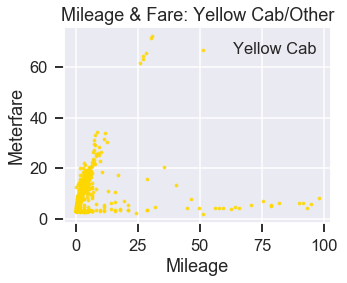

In [9]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df.loc[df.PROVIDER=="Yellow Cab of DC"].TRIPMILEAGE, 
            df.loc[df.PROVIDER=="Yellow Cab of DC"].METERFARE, 
            s=5, 
            alpha=0.8,
            c = "gold")
plt.scatter(df.loc[df.PROVIDER!="Yellow Cab of DC"].TRIPMILEAGE, 
            df.loc[df.PROVIDER!="Yellow Cab of DC"].METERFARE, 
            s=5, 
            alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Meterfare")
plt.title("Mileage & Fare: Yellow Cab/Other")
plt.legend(["Yellow Cab", "Others"])
plt.show()

In [8]:
df["yellowcab"] = df.PROVIDER == "Yellow Cab of DC"
formula = "METERFARE ~ TRIPMILEAGE * yellowcab"
model = smf.ols(formula, df).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              METERFARE   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.126e+05
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:06:12   Log-Likelihood:            -5.0316e+05
No. Observations:              211661   AIC:                         1.006e+06
Df Residuals:                  211657   BIC:                         1.006e+06
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.3770      0.010    518.178      0.000       5.357       5.397
yellowcab[T.True]                 4.9044      0.248     19.804      0.000       4.419       5.390
TRIPMILEAGE                       2.2573      0.004    581.081      0.000       2.250       2.265
TRIPMILEAGE:yellowcab[T.True]    -2.2101      0.037    -59.028      0.000      -2.283      -2.137
==============================================================================
Omnibus:                   110677.893   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         67978501.351
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                      90.765   Cond. No.                         98.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [11]:
# df.loc[df.PROVIDER=="Yellow Cab of DC", "TRIPMILEAGE"] = df.loc[df.PROVIDER=="Yellow Cab of DC", "TRIPMILEAGE"] / 1.6

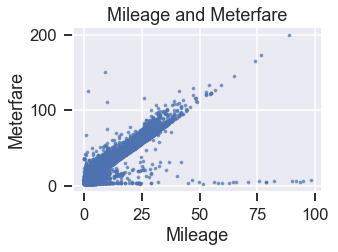

In [11]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df.TRIPMILEAGE, 
            df.METERFARE, 
            s=5, 
            alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Meterfare")
plt.title("Mileage and Meterfare")
plt.tight_layout()
plt.show()

In [10]:
formula = "METERFARE ~ TRIPMILEAGE"
model = smf.ols(formula, df).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              METERFARE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:09:55   Log-Likelihood:            -5.3703e+05
No. Observations:              211661   AIC:                         1.074e+06
Df Residuals:                  211659   BIC:                         1.074e+06
Df Model:                           1                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6118      0.053    105.200      0.000       5.507       5.716
TRIPMILEAGE     2.1702      0.019    113.097      0.000       2.133       2.208
==============================================================================
Omnibus:                   399662.797   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6388853747.590
Skew:                         -13.609   Prob(JB):                         0.00
Kurtosis:                     853.696   Cond. No.                         6.18
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

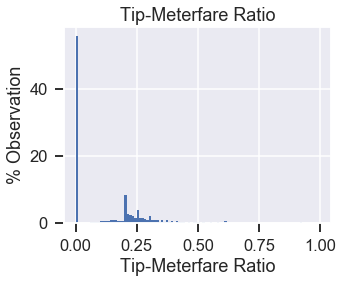

In [12]:
plt.figure(figsize=(4.8, 3.6))
df.loc[df.tip_ratio<1].tip_ratio.hist(bins=100, density=True)
plt.title("Tip-Meterfare Ratio")
plt.xlabel("Tip-Meterfare Ratio")
plt.ylabel("% Observation")
plt.show()

In [13]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit1 = smf.logit(formula, df).fit(cov_type="HC1")
logit1.summary()

         Current function value: 0.161153
         Iterations: 35


/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                tipping   No. Observations:               211661
Model:                          Logit   Df Residuals:                   211618
Method:                           MLE   Df Model:                           42
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.7656
Time:                        13:10:37   Log-Likelihood:                -34110.
converged:                      False   LL-Null:                   -1.4552e+05
                                        LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.3739      0.150    -29.250      0.000      -4.667      -4.081
AIRPORT[T.True]                                  0.2623      0.034      7.792      0.000       0.196       0.328
C(PAYMENTTYPE)[T.CreditCard]                     7.0646      0.046    153.256      0.000       6.974       7.155
C(PAYMENTTYPE)[T.Voucher]                        6.1416      0.312     19.677      0.000       5.530       6.753
C(pickup_date)[T.datetime.date(2017, 2, 6)]      0.3407      0.044      7.695      0.000       0.254       0.427
C(pickup_date)[T.datetime.date(2017, 2, 7)]      0.4729      0.043     10.958      0.000       0.388       0.557
C(pickup_date)[T.datetime.date(2017, 2, 8)]      0.6135      0.042     14.569      0.000       0.531       0.696
C(pickup_date)[T.datetime.date(2017, 2, 9)]      0.5193      0.041     12.565      0.000       0.438       0.600
C(pickup_date)[T.datetime.date(2017, 2, 10)]     0.3315      0.042      7.975      0.000       0.250       0.413
C(pickup_date)[T.datetime.date(2017, 2, 11)]     0.0795      0.044      1.805      0.071      -0.007       0.166
C(pickup_hour)[T.1]                             -0.1151      0.099     -1.162      0.245      -0.309       0.079
C(pickup_hour)[T.2]                             -0.1323      0.109     -1.210      0.226      -0.347       0.082
C(pickup_hour)[T.3]                             -0.2752      0.144     -1.908      0.056      -0.558       0.007
C(pickup_hour)[T.4]                             -0.6120      0.165     -3.705      0.000      -0.936      -0.288
C(pickup_hour)[T.5]                             -0.9981      0.141     -7.096      0.000      -1.274      -0.722
C(pickup_hour)[T.6]                             -1.0017      0.114     -8.812      0.000      -1.224      -0.779
C(pickup_hour)[T.7]                             -0.6659      0.090     -7.361      0.000      -0.843      -0.489
C(pickup_hour)[T.8]                             -0.4695      0.081     -5.800      0.000      -0.628      -0.311
C(pickup_hour)[T.9]                             -0.3385      0.079     -4.312      0.000      -0.492      -0.185
C(pickup_hour)[T.10]                            -0.2041      0.078     -2.601      0.009      -0.358      -0.050
C(pickup_hour)[T.11]                            -0.2063      0.077     -2.669      0.008      -0.358      -0.055
C(pickup_hour)[T.12]                            -0.1543      0.078     -1.987      0.047      -0.307      -0.002
C(pickup_hour)[T.13]                             0.0032      0.077      0.042      0.967      -0.148       0.155
C(pickup_hour)[T.14]                            -0.0817      0.076     -1.072      0.284      -0.231       0.068
C(pickup_hour)[T.15]                            -0.0883      0.076     -1.156      0.247      -0.238       0.061
C(pickup_hour)[T.16]                            -0.0951      0.077     -1.239

In [15]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(dropoff_quadrant) \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit2 = smf.logit(formula, df).fit(cov_type="HC1")
logit2.summary()

         Current function value: 0.151434
         Iterations: 35


LinAlgError: Singular matrix

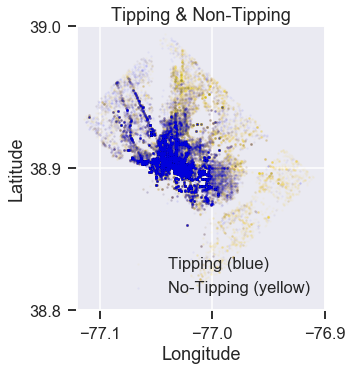

In [17]:
plt.figure(figsize=(5, 5.25))

plt.scatter(df.loc[df.tipping==0].DROPOFF_BLOCK_LONGITUDE,
            df.loc[df.tipping==0].DROPOFF_BLOCK_LATITUDE,
            alpha=0.05,
            s=0.5,
            c="gold")
plt.scatter(df.loc[df.tipping==1].DROPOFF_BLOCK_LONGITUDE,
            df.loc[df.tipping==1].DROPOFF_BLOCK_LATITUDE, 
            alpha=0.05, 
            s=0.5,
            c="blue")

plt.xlim(-77.12, -76.90)
plt.ylim(38.80, 39.00)
plt.title("Tipping & Non-Tipping")
plt.legend(["Tipping (blue)", "No-Tipping (yellow)"], loc=4)

plt.xlabel("Longitude")
plt.xticks([-77.1, -77, -76.9])
plt.ylabel("Latitude")
plt.yticks([38.8, 38.9, 39])
plt.tight_layout()
plt.show()

In [18]:
df["distance_capitol"] = np.sqrt((df.DROPOFF_BLOCK_LATITUDE-38.8899)**2
                                 +(df.DROPOFF_BLOCK_LONGITUDE+77.0091)**2)

In [19]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(dropoff_quadrant) \
                     + distance_capitol \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit3 = smf.logit(formula, df).fit(cov_type="HC1")
logit3.summary()

Optimization terminated successfully.
         Current function value: 0.150846
         Iterations 33


LinAlgError: Singular matrix

In [20]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(dropoff_quadrant) * distance_capitol \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit4 = smf.logit(formula, df).fit(cov_type="HC1")
logit4.summary()

         Current function value: 0.149848
         Iterations: 35


LinAlgError: Singular matrix

In [21]:
ts_tipping = df.groupby("pickup_datetime").tipping.mean()

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


<Figure size 432x288 with 0 Axes>

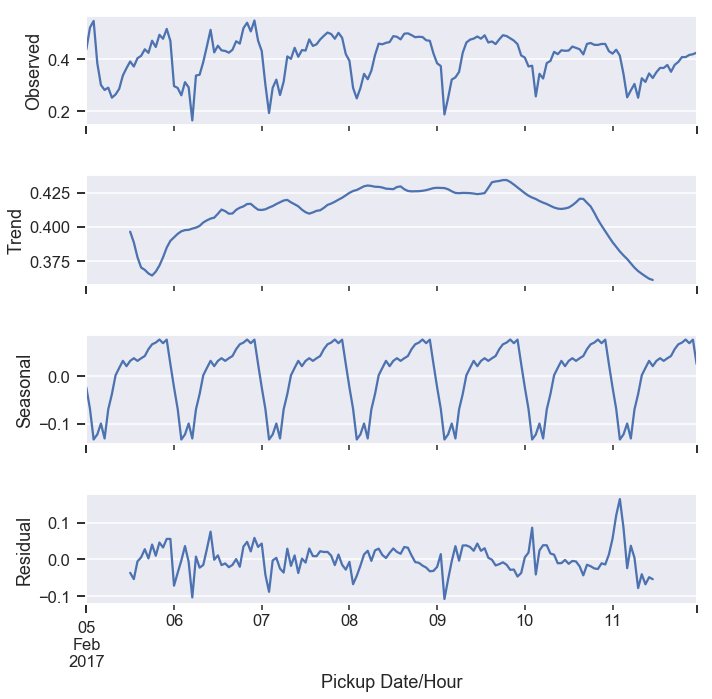

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_tipping, freq=24)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.xlabel("Pickup Date/Hour")
plt.tight_layout()

plt.show()